# Import Library

Import library yang akan digunakan

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report




# Data Preprocessing

Membaca file csv bank-additional-full.csv

In [21]:
df = pd.read_csv('Dataset/bank-additional-full.csv', sep=";")

Menampilkan informasi pada setiap kolom

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [23]:
df.head(2)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [24]:
df.rename(columns={"y": "option"}, inplace=True)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,option
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [25]:
pie = df['option'].value_counts()
pie

no     36548
yes     4640
Name: option, dtype: int64

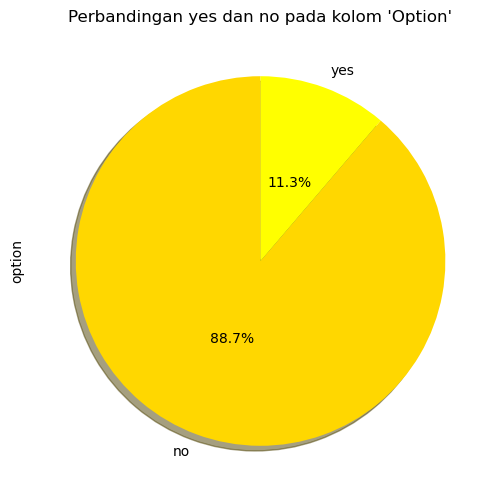

In [26]:
color_list = ["gold", "yellow"]
pie.plot(
    kind='pie'
    ,figsize=(15,6)
    ,autopct='%1.1f%%'
    ,startangle=90
    ,shadow=True
    ,colors=color_list
    ,pctdistance=0.45
)
plt.title("Perbandingan yes dan no pada kolom 'Option'")
plt.show()

Pie menampilkan data didominasi oleh opsi 'no' , pilihan ini mempenggaruhi akurasi model nantinya, model akan cenderung lebih dominan baik dalam memprediksi kelas 'no' daripada 'yes'.

In [27]:
df['age'].unique()

array([56, 57, 37, 40, 45, 59, 41, 24, 25, 29, 35, 54, 46, 50, 39, 30, 55,
       49, 34, 52, 58, 32, 38, 44, 42, 60, 53, 47, 51, 48, 33, 31, 43, 36,
       28, 27, 26, 22, 23, 20, 21, 61, 19, 18, 70, 66, 76, 67, 73, 88, 95,
       77, 68, 75, 63, 80, 62, 65, 72, 82, 64, 71, 69, 78, 85, 79, 83, 81,
       74, 17, 87, 91, 86, 98, 94, 84, 92, 89], dtype=int64)

Menampilkan nilai unik pada fitur age

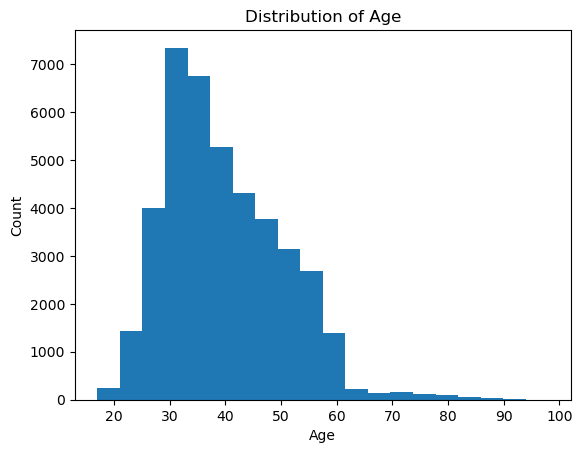

In [28]:
df['age'].plot(
    kind='hist', 
    bins=20)
plt.title("Distribusi Umur")
plt.xlabel("Umur")
plt.ylabel("Total")
plt.show()

Menampilkan distribusi umur lebih condong kekiri menandakan distribusi lebih banyak pada range 30 - 35.

Menampilkan korelasi antar kolom:

C:\Users\Fadli Putra\AppData\Local\Temp\ipykernel_6020\4007490360.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: title={'center': 'Correlation in Headmap\n'}>

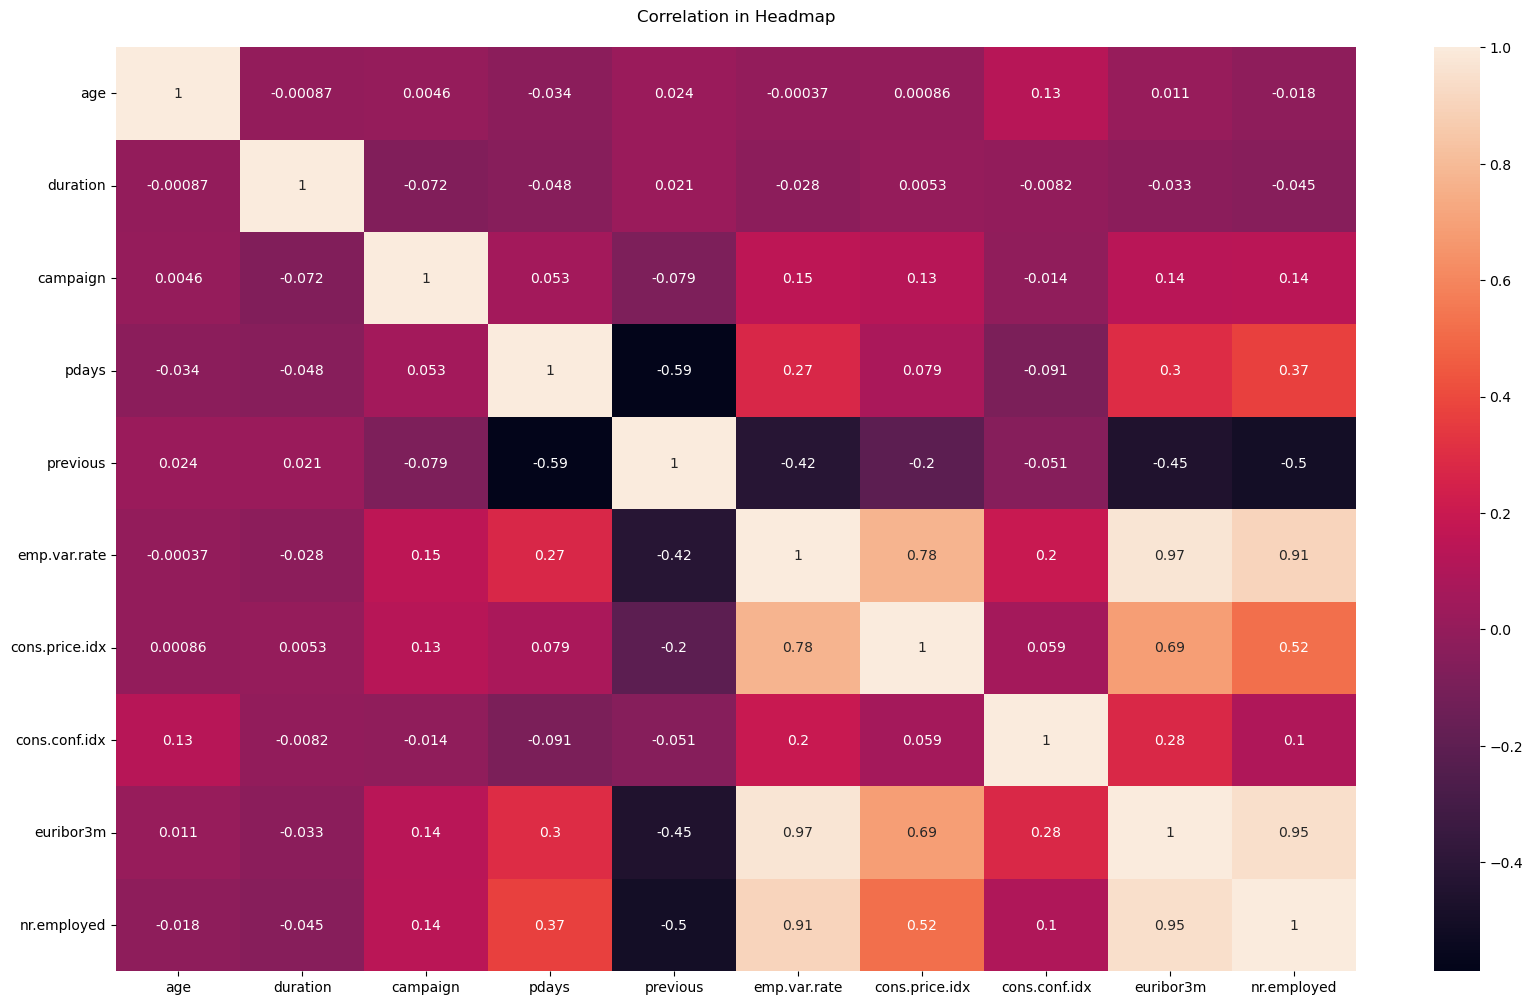

In [29]:
plt.figure(figsize=(20, 12))
plt.title('Correlation in Headmap\n')
sns.heatmap(df.corr(),annot=True)

In [30]:
# Deklarasi variabel untuk menampung fungsi model LabelEncoder()
le = LabelEncoder()

# Fitur yang dipilih untuk dikonversi
LblEncd = ['job', 'marital', 'education', 'default','contact', 'housing', 'loan', 'month', 'day_of_week', 'poutcome', 'option']

# Konversi fitur menggunakan LabelEncoder
for var in LblEncd:
    df[var] = le.fit_transform(df[var])

df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,option
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [31]:
X = df.drop('option', axis=1)
y = df['option']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [32]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### Criteria Model
* logistic Regression
* K-Nearest Neighbors
* SVM
* Decision Tree
* Random Forest
* Naive Bayes
* Confusion Matrix

# Logistic Regression

Akurasi Model: 0.910536537994659 

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7303
           1       0.67      0.42      0.52       935

    accuracy                           0.91      8238
   macro avg       0.80      0.70      0.73      8238
weighted avg       0.90      0.91      0.90      8238


Confusion matrix:


<Axes: >

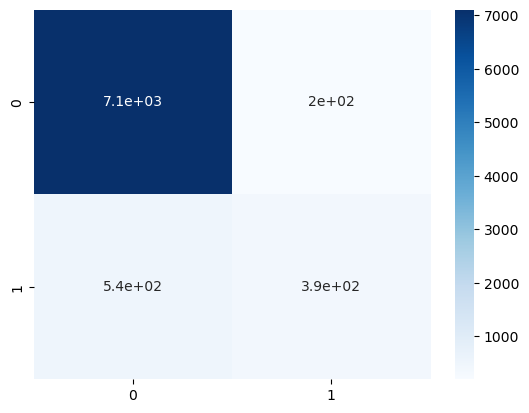

In [33]:
# Deklarasi variabel logreg untuk menampung fungsi model LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)

y_pred = logreg.predict(X_test_scaled)

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Akurasi Model:", accuracy, "\n")
print(report)
print("\nConfusion matrix:")
sns.heatmap(cm, annot=True, cmap='Blues')

# K-Nearest Neighbors

In [34]:
param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}

# Deklarasi variabel knn untuk menampung fungsi model KNeighborsClassifier()
knn = KNeighborsClassifier()

grid_search = GridSearchCV(knn, param_grid, cv=5)

grid_search.fit(X_train_scaled, y_train)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")


Best Parameters: {'n_neighbors': 11}
Best Score: 0.9041274658573597


Akurasi Model: 0.9039815489196407 

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      7303
           1       0.64      0.35      0.45       935

    accuracy                           0.90      8238
   macro avg       0.78      0.66      0.70      8238
weighted avg       0.89      0.90      0.89      8238



<Axes: >

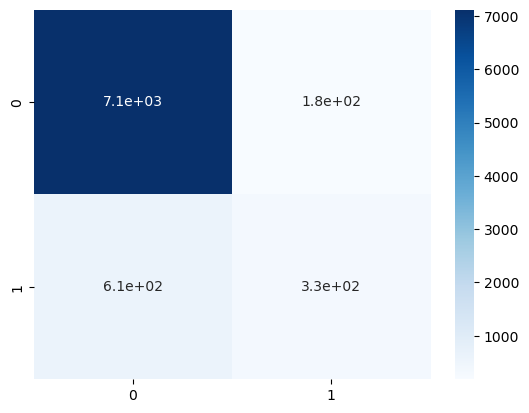

In [35]:
k = 19
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi Model: {accuracy}", "\n")

report = classification_report(y_test, y_pred)
print(report)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues')

# SVM

Grid Parameter: {'C': 1}
Score akurasi: 0.9093171471927162

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      7303
           1       0.67      0.40      0.50       935

    accuracy                           0.91      8238
   macro avg       0.80      0.69      0.73      8238
weighted avg       0.90      0.91      0.90      8238


Accuracy Score: 0.9095654285020636
Confusion Matrix:



<Axes: >

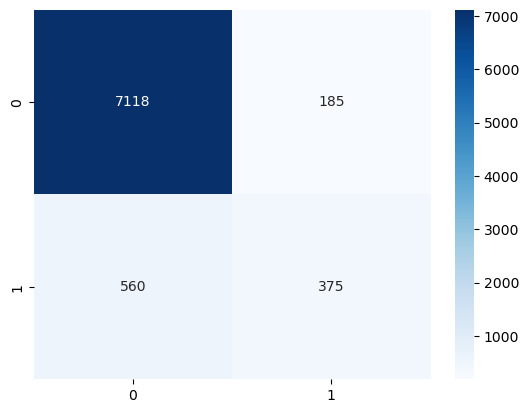

In [36]:
# Definisi SVM
svm = SVC(random_state=42)

# Parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100]
}

# Performa grid
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Parameter dan akurasi terbaik
print("Grid Parameter:", grid_search.best_params_)
print("Score akurasi:", grid_search.best_score_)

best_estimator = grid_search.best_estimator_
y_pred = best_estimator.predict(X_test_scaled)

print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

# Decision Tree

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      7303
           1       0.51      0.52      0.51       935

    accuracy                           0.89      8238
   macro avg       0.72      0.73      0.73      8238
weighted avg       0.89      0.89      0.89      8238

Akurasi Model: 0.8888079630978393


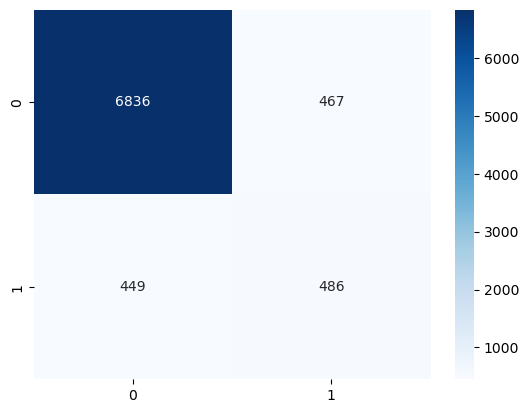

In [37]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train_scaled, y_train)

y_pred = dtc.predict(X_test_scaled)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

report = classification_report(y_test, y_pred)
print(report)

accuracy = accuracy_score(y_test, y_pred)
print('Akurasi Model:', accuracy)

# Random Forest

Grid parameter: {'n_estimators': 150}
Score akurasi: 0.9133535660091047
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7303
           1       0.65      0.53      0.58       935

    accuracy                           0.91      8238
   macro avg       0.79      0.74      0.77      8238
weighted avg       0.91      0.91      0.91      8238

Akurasi Model: 0.9136926438455936


<Axes: >

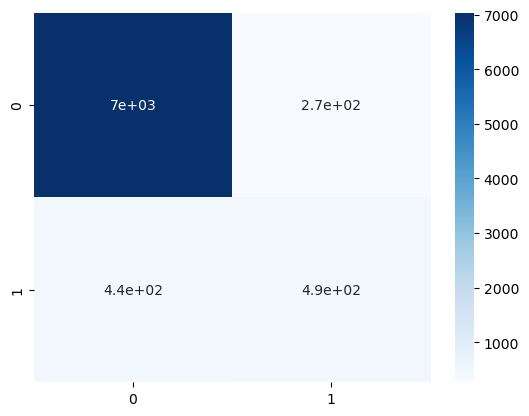

In [38]:
# Grid Parameter
param_grid = {
    'n_estimators': [50, 100, 150, 200, 250]
}

# Membuat objek pada grid
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5)

grid_search.fit(X_train_scaled, y_train)

# Print best parameters and corresponding mean cross-validated score
print("Grid parameter:", grid_search.best_params_)
print("Score akurasi:", grid_search.best_score_)

# Training model Random Forest
best_rf = RandomForestClassifier(n_estimators=grid_search.best_params_['n_estimators'], random_state=42)
best_rf.fit(X_train_scaled, y_train)

# Predict
y_pred = best_rf.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

# Akurasi model
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi Model:", accuracy)

# show
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues")

# Naive Bayes


Classification report:
              precision    recall  f1-score   support

           0       0.95      0.88      0.91      7303
           1       0.40      0.61      0.48       935

    accuracy                           0.85      8238
   macro avg       0.67      0.75      0.70      8238
weighted avg       0.88      0.85      0.86      8238


Score Akurasi: 0.8505705268268997
Confusion matrix:


<Axes: >

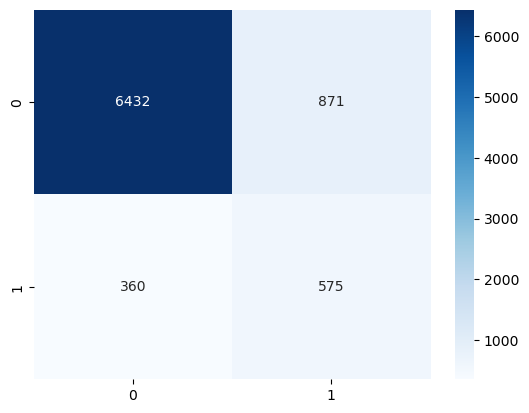

In [39]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

y_pred = nb_model.predict(X_test)

print("\nClassification report:")
print(classification_report(y_test, y_pred))

print("\nScore Akurasi:", accuracy_score(y_test, y_pred))

print("Confusion matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")


# Rangkuman

Setelah melakukan beberapa percobaan dengan berbagai model, terlihat bahwa Logistic Regression dan Random Forest memberikan akurasi terbaik di antara algoritma lain untuk dataset bank marketing. Namun, jika kita membandingkan keduanya, Random Forest dapat dianggap sebagai yang terbaik. Hal ini dapat dilihat dari confusion matrix, di mana jumlah true positive pada Random Forest jauh lebih tinggi, yaitu sekitar 4.9e+, dibandingkan dengan Logistic Regression yang hanya mencapai sekitar 3.9e+02. Selain itu, Random Forest juga memiliki presisi recall yang lebih tinggi, terutama untuk kelas 1.

Random Forest dianggap sebagai pilihan terbaik karena mampu menghasilkan prediksi yang baik untuk kedua kelas, yakni "yes" dan "no", yang keduanya memiliki nilai penting dalam konteks prediksi di masa depan. Dengan demikian, Random Forest dapat dijadikan pilihan yang lebih baik untuk mengatasi kebutuhan prediksi pada dataset bank marketing.